In [2]:
"""
Cart Pole:
Observation:
0: Cart Position [-4.8, 4.8], with episode ending at [-2.4, 2.4]
1: Cart Velocity [-Inf, Inf]
2: Pole Angle [-0.418, 0.418] (in radians) with episode ending at [-0.2095, 0.2095]
3: Pole Angular Velocity [-Inf, Inf]

Env.Reset():
returns tuple:
0: observation
1: info

Env.Step():
returns tuple:
0: observation
1: reward
2: done
3: truncated
4: info

Notes:

- optimistic initialization helped explore the unseen actions
- with optmistic intialization, both reward functions performed similarly
- e-soft:
    - with 10000 steps, and epsilon 0.01 performs worse than optimistic initialization
        - no obvious differnce between epsilon soft with custom reward function (50-50 cart position : pole angle)
    - 6,000 steps, 5 trials averaged, 0.04 epsilon:
        - still performs worse than optimistic initially
        - custom reward function (80% pole angle - 20% cart position) may be overtaking default reward function it around 6000 steps?
    - 10,000 steps, 2 trials averaged, 0.04 epsilon
        - custom reword (80:20) results in much longer episode lengths        
- every visit vs first visit has no distiguishable differece in performance both in returns and 
    
- TODO: 
    - try off policy MC
"""

'\nCart Pole:\nObservation:\n0: Cart Position [-4.8, 4.8], with episode ending at [-2.4, 2.4]\n1: Cart Velocity [-Inf, Inf]\n2: Pole Angle [-0.418, 0.418] (in radians) with episode ending at [-0.2095, 0.2095]\n3: Pole Angular Velocity [-Inf, Inf]\n\nEnv.Reset():\nreturns tuple:\n0: observation\n1: info\n\nEnv.Step():\nreturns tuple:\n0: observation\n1: reward\n2: done\n3: truncated\n4: info\n\n\n\nNotes:\n\n- optimistic initialization helped explore the unseen actions\n- with optmistic intialization, both reward functions performed similarly\n- without optimistic initialization:\n    - TBD\n\n- TODO: \n    - try epsilon greedy MC\n    - try off policy MC\n    - evaluate first visit vs every visit\n'

In [1]:
from discretize import discretize
from collections import defaultdict
from monte_carlo import *
from q_io import *
import gymnasium as gym
from plots import *

In [2]:
epsilon = 0.04
num_episodes = 10000
gamma = 0.95
num_to_avg = 2
env = gym.make('CartPole-v1')

In [12]:
# all_Qs = []
# all_policies = []
# all_returns = []
# all_episode_lengths = []

# for i in range(num_to_avg):
#     Q, policy, returns, episode_lengths = on_policy_mc_control_epsilon_soft(env, num_episodes, gamma, epsilon)
#     all_Qs.append(Q)
#     all_policies.append(policy)
#     all_returns.append(returns)
#     all_episode_lengths.append(episode_lengths)

# avg_returns_e_soft = np.average(all_returns, axis=0)
# avg_episode_lengths_e_soft = np.average(all_episode_lengths, axis=0)

In [3]:
all_Qs = []
all_policies = []
all_returns = []
all_episode_lengths = []

for i in range(num_to_avg):
    Q, policy, returns, episode_lengths = on_policy_mc_control_epsilon_soft_every_visit(
        env,
        num_episodes,
        gamma,
        epsilon,
        episode_generator_func=generate_episode_reward_central_vertical,
    )
    all_Qs.append(Q)
    all_policies.append(policy)
    all_returns.append(returns)
    all_episode_lengths.append(episode_lengths)

avg_returns_e_soft_custom_reward_every_visit = np.average(all_returns, axis=0)
avg_episode_lengths_e_soft_custom_reward_every_visit = np.average(all_episode_lengths, axis=0)

In [4]:
all_Qs = []
all_policies = []
all_returns = []
all_episode_lengths = []

for i in range(num_to_avg):
    Q, policy, returns, episode_lengths = on_policy_mc_control_epsilon_soft(
        env,
        num_episodes,
        gamma,
        epsilon,
        episode_generator_func=generate_episode_reward_central_vertical,
    )
    all_Qs.append(Q)
    all_policies.append(policy)
    all_returns.append(returns)
    all_episode_lengths.append(episode_lengths)

avg_returns_e_soft_custom_reward = np.average(all_returns, axis=0)
avg_episode_lengths_e_soft_custom_reward = np.average(all_episode_lengths, axis=0)

In [14]:
# save_array(avg_returns_e_soft, "testing/10000_eps_95gamma_04epsilon/e_soft_returns_default.csv")
# save_array(avg_episode_lengths_e_soft, "testing/10000_eps_95gamma_04epsilon/e_soft_episode_lengths_default.csv")
# save_array(avg_returns_optimistic, "testing/6000_ep_95gamma_0.04epsilon/optimistic_returns_default.csv")
# save_array(avg_episode_lengths_optimistic, "testing/6000_ep_95gamma_0.04epsilon/optimistic_episode_lengths_default.csv")
# save_array(avg_returns_e_soft_custom_reward, "testing/10000_eps_95gamma_04epsilon/e_soft_returns_custom_reward.csv")
# save_array(avg_episode_lengths_e_soft_custom_reward, "testing/10000_eps_95gamma_04epsilon/e_soft_episode_lengths_custom_reward.csv")


# avg_returns_e_soft = load_array("testing/e_soft_returns_default.csv")
# avg_episode_lengths_e_soft = load_array("testing/e_soft_episode_lengths_default.csv")
# avg_returns_optimistic = load_array("testing/10000_eps_99gamma_0.01epsilon_10_averaged/optimistic_returns_default.csv")
# avg_episode_lengths_optimistic = load_array("testing/10000_eps_99gamma_0.01epsilon_10_averaged/optimistic_episode_lengths_default.csv")
# avg_returns_e_soft_custom_reward = load_array("testing/e_soft_returns_custom_reward.csv")
# avg_episode_lengths_e_soft_custom_reward = load_array("testing/e_soft_episode_lengths_custom_reward.csv")

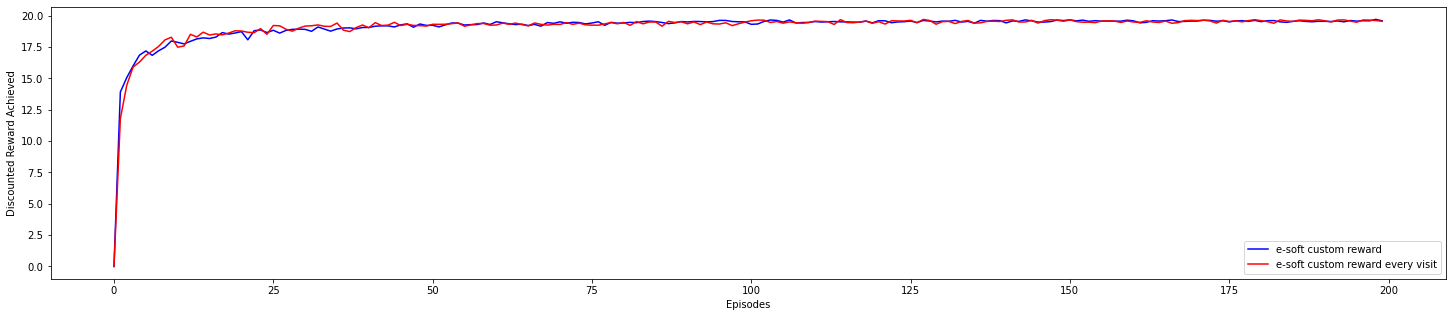

In [13]:
k = 1

# plot_returns_different_agents(
#     [
#         avg_episode_lengths_e_soft_custom_reward[::k],
#         avg_episode_lengths_e_soft_custom_reward_every_visit[::k],
#     ],
#     ["first visit", "every visit"],
# )


list_1 = []
list_2 = []
step_size = 50
sum_1 = 0
sum_2 = 0
for i in range(10000):
    if i % step_size == 0:
        list_1.append(sum_1 / step_size)
        list_2.append(sum_2 / step_size)
        sum_1 = 0
        sum_2 = 0
    sum_1 += avg_returns_e_soft_custom_reward[i]
    sum_2 += avg_returns_e_soft_custom_reward_every_visit[i]


plot_returns_different_agents(
    [list_1, list_2], ["e-soft custom reward", "e-soft custom reward every visit"]
)

In [28]:
env = gym.make('CartPole-v1', render_mode='human')
# Q = load_q_values("optimistic_initialization/large_negative_reward/q/5000_episodes_95_gamma_0.csv")
run_iterations(env, Q, 10)

KeyboardInterrupt: 

In [ ]:
# # load values
# returns_neg_reward = [[] for i in range(5)]
# episode_lengths_neg_reward = [[] for i in range(5)]
# returns_reg_reward = [[] for i in range(5)]
# episode_lengths_reg_reward = [[] for i in range(5)]

# for i in range(5):
#     returns_neg_reward[i] = load_array(f"optimistic_initialization/large_negative_reward/returns/5000_episodes_95_gamma_{i}.csv")
#     episode_lengths_neg_reward[i] = load_array(f"optimistic_initialization/large_negative_reward/episode_length/5000_episodes_95_gamma_{i}.csv")
#     returns_reg_reward[i] = load_array(f"optimistic_initialization/regular_reward/returns/5000_episodes_95_gamma_{i}.csv")
#     episode_lengths_reg_reward[i] = load_array(f"optimistic_initialization/regular_reward/episode_length/5000_episodes_95_gamma_{i}.csv")


In [8]:
plot_returns([returns_neg_reward], ['negative reward'])

NameError: name 'returns_neg_reward' is not defined

In [ ]:
plot_returns([returns_reg_reward], ['regular reward'])


In [ ]:
plot_single_iteration_returns(np.log10(np.average(episode_lengths_reg_reward, axis=0)))

In [ ]:
plot_single_iteration_returns(np.log10(np.average(episode_lengths_neg_reward, axis=0)))